In [1]:
# -*- coding: utf-8 -*-
import re

def test():    
    s=response_body.decode('utf-8')
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글과 띄어쓰기를 제외한 모든 글자
    # hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')  # 위와 동일
    result = hangul.sub('', s) # 한글과 띄어쓰기를 제외한 모든 부분을 제거
    return result

In [2]:
from konlpy.tag import Twitter; t = Twitter()
import nltk #일반적인 영문에 사용
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from wordcloud import ImageColorGenerator
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

C:\Python\Python37\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\Python\Python37\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


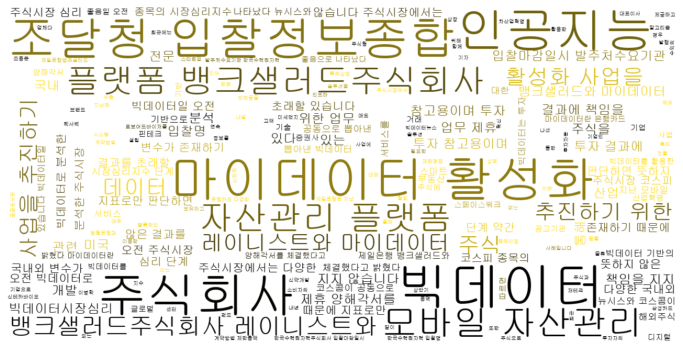

In [7]:
client_id = "5hPYXWPfTFjl27udTnAH" # 애플리케이션 등록시 발급 받은 값 입력
client_secret = "giagkQWVat" # 애플리케이션 등록시 발급 받은 값 입력
encText = urllib.parse.quote("빅데이터 주식") ## 검색할 키워드 입력
url = "https://openapi.naver.com/v1/search/news.xml?query=" + encText +"&display=100" # 1 ~ 최대 100
request = urllib.request.Request(url)
request.add_header("Content-Type",'application/xml')
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
naver = test()
t=Twitter()
tokens_ko = t.nouns(naver)
ko = nltk.Text(tokens_ko, name='주식') # 키워드
#필요없는 글자 제외
stop_words = ['번', '곳', '분', '수', '때'] # 삭제할 단어 입력
ko = [each_word for each_word in ko if each_word not in stop_words]
ko = nltk.Text(ko, name='주식')
text = naver
mask = np.array(Image.open('bus.png')) #### 워드클라우드를 그릴 png파일 넣기.
wc = WordCloud(background_color='white', max_words=2000, mask=mask)
wc = wc.generate(text)
image_colors = ImageColorGenerator(mask)
wordcloud = WordCloud(font_path='c:/Windows/Fonts/gulim.ttc',
               relative_scaling = 0.1,
               background_color = 'white', mask = mask,
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(wc.words_))
default_colors = wordcloud.to_array()
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#뿌릴 용도

# -*- coding: utf-8 -*-
import re

def test():    
    s=response_body.decode('utf-8')
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글과 띄어쓰기를 제외한 모든 글자
    # hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')  # 위와 동일
    result = hangul.sub('', s) # 한글과 띄어쓰기를 제외한 모든 부분을 제거
    return result

from konlpy.tag import Twitter; t = Twitter()
import nltk #일반적인 영문에 사용
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from wordcloud import ImageColorGenerator
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

client_id = "본인 API ID" # 애플리케이션 등록시 발급 받은 값 입력
client_secret = "본인 SECRET ID" # 애플리케이션 등록시 발급 받은 값 입력
encText = urllib.parse.quote("대전버스") ## 검색할 키워드 입력
url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText +"&display=100" # 1 ~ 최대 100
request = urllib.request.Request(url)
request.add_header("Content-Type",'application/xml')
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
naver = test()
t=Twitter()
tokens_ko = t.nouns(naver)
ko = nltk.Text(tokens_ko, name='대전 버스') # 키워드
#필요없는 글자 제외
stop_words = ['번', '곳', '분', '수', '때'] # 삭제할 단어 입력
ko = [each_word for each_word in ko if each_word not in stop_words]
ko = nltk.Text(ko, name='대전 버스')
text = naver
mask = np.array(Image.open('bus.png')) #### 워드클라우드를 그릴 png파일 넣기.
wc = WordCloud(background_color='white', max_words=2000, mask=mask)
wc = wc.generate(text)
image_colors = ImageColorGenerator(mask)
wordcloud = WordCloud(font_path='c:/Windows/Fonts/gulim.ttc',
               relative_scaling = 0.1,
               background_color = 'white', mask = mask,
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(wc.words_))
default_colors = wordcloud.to_array()
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()